In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-05-18T19:22:22.788Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 9690}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10216, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10216,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937716e+07,1.937716e+07,False,NaN,1,NaN,NaN,None,2023-05-18T19:21:00.000Z,26640.518880,1.545873e+10,9.6369,0.210227,-2.739044,-1.252363,-11.859251,-6.011265,9.707427,5.162175e+11,46.3144,5.594509e+11,None,2023-05-18T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:22:50.952050
1,1027,Ethereum,ETH,ethereum,6914,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202793e+08,1.202793e+08,True,NaN,2,NaN,NaN,None,2023-05-18T19:21:00.000Z,1788.332312,5.569646e+09,-7.4704,0.426334,-2.377782,-0.246163,-14.184112,-2.681919,5.855275,2.150994e+11,19.2900,2.150994e+11,None,2023-05-18T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:22:50.952050
2,825,Tether,USDT,tether,53685,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284543e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-18T19:21:00.000Z,1.000047,2.301326e+10,0.6689,-0.000927,0.015591,-0.035762,-0.045647,-0.275440,-0.008697,8.284934e+10,7.4299,8.609469e+10,None,2023-05-18T19:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-18 20:22:50.952050
3,1839,BNB,BNB,bnb,1378,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558590e+08,1.558590e+08,False,NaN,4,NaN,NaN,None,2023-05-18T19:21:00.000Z,307.547790,3.830022e+08,-9.2102,0.263296,-2.009367,0.393848,-9.973372,-9.878814,-1.316114,4.793408e+10,4.2987,4.793408e+10,None,2023-05-18T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:22:50.952050
4,3408,USD Coin,USDC,usd-coin,12537,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.964830e+10,2.964830e+10,False,NaN,5,NaN,NaN,None,2023-05-18T19:21:00.000Z,0.999950,3.041469e+09,2.3925,-0.015863,0.007102,0.012283,-0.011200,0.009601,-0.005140,2.964681e+10,2.6599,2.964681e+10,None,2023-05-18T19:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-18 20:22:50.952050
5,52,XRP,XRP,xrp,950,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-18T19:21:00.000Z,0.455414,1.304583e+09,-22.4030,1.019518,1.337544,9.400290,-12.429089,15.124364,16.015002,2.360768e+10,2.1171,4.554142e+10,None,2023-05-18T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:22:50.952050
6,2010,Cardano,ADA,cardano,789,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.485611e+10,3.579395e+10,False,NaN,7,NaN,NaN,None,2023-05-18T19:21:00.000Z,0.369241,2.131185e+08,7.2132,0.557094,-2.710712,4.393152,-15.867138,4.810478,-8.561610,1.287032e+10,1.1542,1.661586e+10,None,2023-05-18T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:22:50.952050
7,74,Dogecoin,DOGE,dogecoin,710,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.393996e+11,1.393996e+11,True,NaN,8,NaN,NaN,None,2023-05-18T19:21:00.000Z,0.072007,2.891252e+08,-8.6663,-0.443382,-4.356177,2.382151,-22.632589,-5.960131,-17.631402,1.003774e+10,0.9002,1.003774e+10,None,2023-05-18T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:22:50.952050
8,5426,Solana,SOL,solana,463,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.957751

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df
    
    if not os.path.isfile(r'C:\Users\APINPC\Desktop\projects\Python\API.csv'):
        
        df.to_csv(r'C:\Users\APINPC\Desktop\projects\Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\APINPC\Desktop\projects\Python\API.csv',mode='a', header=False)

In [6]:
import os
from time import time 
from time import sleep
for i in range(333):
    api_runner()
    print("API call completed")
    sleep(60) #sleep for 1 minute
exit()

API call completed
API call completed


KeyboardInterrupt: 

In [7]:
df1 = pd.read_csv(r'C:\Users\APINPC\Desktop\projects\Python\API.csv')
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.937534e+07,1.937534e+07,False,NaN,1,NaN,NaN,NaN,2023-05-16T20:47:00.000Z,26990.756227,1.288369e+10,-8.9751,0.016282,-1.351997,-2.361662,-11.275296,1.039530,12.291893,5.229550e+11,46.4875,5.668059e+11,NaN,2023-05-16T20:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-16 20:48:27.323650
1,1,1027,Ethereum,ETH,ethereum,6896,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202870e+08,1.202870e+08,True,NaN,2,NaN,NaN,NaN,2023-05-16T20:47:00.000Z,1823.377851,5.603116e+09,-16.9616,0.127237,-0.170872,-1.319401,-14.476749,4.842551,9.647390,2.193287e+11,19.4995,2.193287e+11,NaN,2023-05-16T20:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-16 20:48:27.323650
2,2,825,Tether,USDT,tether,53441,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.282263e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-05-16T20:47:00.000Z,1.000259,1.987164e+10,-6.4713,0.016201,-0.018052,0.002425,-0.019207,-0.151787,0.000123,8.284405e+10,7.3653,8.611291e+10,NaN,2023-05-16T20:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-16 20:48:27.323650
3,3,1839,BNB,BNB,bnb,1365,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558594e+08,1.558594e+08,False,NaN,4,NaN,NaN,NaN,2023-05-16T20:47:00.000Z,310.593329,4.063014e+08,-5.3616,-0.075604,-1.052638,-0.482272,-11.071772,-7.181974,-0.765275,4.840888e+10,4.3044,4.840888e+10,NaN,2023-05-16T20:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-16 20:48:27.323650
4,4,3408,USD Coin,USDC,usd-coin,12421,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.966225e+10,2.966225e+10,False,NaN,5,NaN,NaN,NaN,2023-05-16T20:47:00.000Z,1.000191,2.748347e+09,-11.2175,0.025718,0.010103,0.039174,0.056517,0.048406,-0.002177,2.966791e+10,2.6376,2.966791e+10,NaN,2023-05-16T20:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-16 20:48:27.323650
5,5,52,XRP,XRP,xrp,945,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,NaN,2023-05-16T20:47:00.000Z,0.424457,7.622342e+08,5.9412,0.049949,-0.841898,-0.253203,-18.691312,13.390442,6.244732,2.200295e+10,1.9562,4.244574e+10,NaN,2023-05-16T20:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-16 20:48:27.323650
6,6,2010,Cardano,ADA,cardano,787,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.485255e+10,3.579395e+10,False,NaN,7,NaN,NaN,NaN,2023-05-16T20:47:00.000Z,0.365406,1.706189e+08,-2.5641,-0.189409,-0.955993,0.583240,-19.283801,7.930934,-9.050650,1.273534e+10,1.1322,1.644327e+10,NaN,2023-05-16T20:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-16 20:48:27.323650
7,7,74,Dogecoin,DOGE,dogecoin,707,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.393734e+11,1.393734e+11,True,NaN,8,NaN,NaN,NaN,2023-05-16T20:47:00.000Z,0.072161,1.813392e+08,-18.2989,0.036848,-0.324496,-0.825954,-20.701451,-3.383745,-18.459358,1.005729e+10,0.8941,1.005729e+10,NaN,2023-05-16T20:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-16 20:48:27.323650
8,8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10216,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937716e+07,1.937716e+07,False,NaN,1,NaN,NaN,None,2023-05-18T19:23:00.000Z,26626.833736,1.540846e+10,8.8584,0.139435,-2.630280,-1.217623,-11.874337,-5.909520,9.601580,5.159523e+11,46.2907,5.591635e+11,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
1,1027,Ethereum,ETH,ethereum,6914,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202793e+08,1.202793e+08,True,NaN,2,NaN,NaN,None,2023-05-18T19:23:00.000Z,1787.331400,5.553468e+09,-8.1384,0.292403,-2.251082,-0.214601,-14.194442,-2.559426,5.773294,2.149790e+11,19.2792,2.149790e+11,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
2,825,Tether,USDT,tether,53686,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284543e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-18T19:23:00.000Z,1.000105,2.293219e+10,-0.0585,0.011646,0.015017,-0.033344,-0.041057,-0.266659,-0.001670,8.285411e+10,7.4303,8.609966e+10,None,2023-05-18T19:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-18 20:24:47.709672
3,1839,BNB,BNB,bnb,1378,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558590e+08,1.558590e+08,False,NaN,4,NaN,NaN,None,2023-05-18T19:23:00.000Z,307.518399,3.809358e+08,-9.9856,0.199019,-1.974926,0.448191,-9.968902,-9.885754,-1.372350,4.792950e+10,4.2983,4.792950e+10,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
4,3408,USD Coin,USDC,usd-coin,12537,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.964830e+10,2.964830e+10,False,NaN,5,NaN,NaN,None,2023-05-18T19:23:00.000Z,1.000026,3.037057e+09,2.1827,0.009114,0.007331,0.012157,0.003108,0.028281,-0.006330,2.964906e+10,2.6601,2.964906e+10,None,2023-05-18T19:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-18 20:24:47.709672
5,52,XRP,XRP,xrp,950,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-18T19:23:00.000Z,0.455795,1.303380e+09,-22.5536,0.939542,1.497772,9.518108,-12.415781,15.243353,16.070696,2.362744e+10,2.1189,4.557953e+10,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
6,2010,Cardano,ADA,cardano,789,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.485611e+10,3.579395e+10,False,NaN,7,NaN,NaN,None,2023-05-18T19:23:00.000Z,0.369253,2.097795e+08,3.2897,0.512098,-2.646979,4.456236,-15.867453,4.932451,-8.518032,1.287072e+10,1.1542,1.661638e+10,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
7,74,Dogecoin,DOGE,dogecoin,710,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.393996e+11,1.393996e+11,True,NaN,8,NaN,NaN,None,2023-05-18T19:23:00.000Z,0.071997,2.885192e+08,-9.1549,-0.512844,-4.288026,2.384375,-22.662315,-5.869551,-17.638856,1.003641e+10,0.9001,1.003641e+10,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
8,5426,Solana,SOL,solana,463,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.957751e+

In [9]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10216,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19377156.00000,19377156.00000,False,NaN,1,NaN,NaN,None,2023-05-18T19:23:00.000Z,26626.83374,15408460637.26518,8.85840,0.13944,-2.63028,-1.21762,-11.87434,-5.90952,9.60158,515952311091.15387,46.29070,559163508458.83997,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
1,1027,Ethereum,ETH,ethereum,6914,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120279329.57349,120279329.57349,True,NaN,2,NaN,NaN,None,2023-05-18T19:23:00.000Z,1787.33140,5553467926.38074,-8.13840,0.29240,-2.25108,-0.21460,-14.19444,-2.55943,5.77329,214979022528.35339,19.27920,214979022528.35001,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
2,825,Tether,USDT,tether,53686,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82845432957.31229,86090638895.06883,True,NaN,3,NaN,NaN,None,2023-05-18T19:23:00.000Z,1.00010,22932192419.74670,-0.05850,0.01165,0.01502,-0.03334,-0.04106,-0.26666,-0.00167,82854109721.76828,7.43030,86099655544.13000,None,2023-05-18T19:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-18 20:24:47.709672
3,1839,BNB,BNB,bnb,1378,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155858961.17004,155858961.17004,False,NaN,4,NaN,NaN,None,2023-05-18T19:23:00.000Z,307.51840,380935779.58277,-9.98560,0.19902,-1.97493,0.44819,-9.96890,-9.88575,-1.37235,47929498284.36723,4.29830,47929498284.37000,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
4,3408,USD Coin,USDC,usd-coin,12537,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29648300048.84225,29648300048.84225,False,NaN,5,NaN,NaN,None,2023-05-18T19:23:00.000Z,1.00003,3037057089.70053,2.18270,0.00911,0.00733,0.01216,0.00311,0.02828,-0.00633,29649062226.84533,2.66010,29649062226.85000,None,2023-05-18T19:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-18 20:24:47.709672
5,52,XRP,XRP,xrp,950,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-18T19:23:00.000Z,0.45580,1303380363.15230,-22.55360,0.93954,1.49777,9.51811,-12.41578,15.24335,16.07070,23627436550.26656,2.11890,45579533090.11000,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
6,2010,Cardano,ADA,cardano,789,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34856106283.44800,35793946862.56700,False,NaN,7,NaN,NaN,None,2023-05-18T19:23:00.000Z,0.36925,209779455.95285,3.28970,0.51210,-2.64698,4.45624,-15.86745,4.93245,-8.51803,12870717158.50169,1.15420,16616378990.32000,None,2023-05-18T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-18 20:24:47.709672
7,74,Dogecoin,DOGE,dogecoin,710,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139399556383.70523,139399556383.70523,True,NaN,8,NaN,NaN,None,2023-05-18T19:23:00.000Z,0.07200,288519176.23874,-9.15490,-0.51284,-4.28803,2.38438,-22.66232,-5.86955,-17.63886,10036413969.23734,0.90010,10036413969.24000,None,2023-05-18T19:23:00.000Z,NaN

In [11]:
df2 = df.groupby('name', sort=True)[['quote.USD.percent_change_1h',
                                     'quote.USD.percent_change_24h',
                                     'quote.USD.percent_change_7d',
                                     'quote.USD.percent_change_30d',
                                     'quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
BNB,0.19902,-1.97493,0.44819,-9.96890,-1.37235
Binance USD,-0.01552,-0.01612,-0.02648,-0.01441,0.02511
Bitcoin,0.13944,-2.63028,-1.21762,-11.87434,9.60158
Cardano,0.51210,-2.64698,4.45624,-15.86745,-8.51803
Dogecoin,-0.51284,-4.28803,2.38438,-22.66232,-17.63886
Ethereum,0.29240,-2.25108,-0.21460,-14.19444,5.77329
Litecoin,0.16893,-4.97088,13.16687,-10.82310,-10.16785
Polkadot,0.30391,-2.24354,0.47718,-23.17111,-27.32333
Polygon,0.52149,-4.03680,1.63517,-26.69807,-42.63958


In [12]:
df3 = df2.stack()
df3

name                                     
BNB          quote.USD.percent_change_1h      0.19902
             quote.USD.percent_change_24h    -1.97493
             quote.USD.percent_change_7d      0.44819
             quote.USD.percent_change_30d    -9.96890
             quote.USD.percent_change_90d    -1.37235
Binance USD  quote.USD.percent_change_1h     -0.01552
             quote.USD.percent_change_24h    -0.01612
             quote.USD.percent_change_7d     -0.02648
             quote.USD.percent_change_30d    -0.01441
             quote.USD.percent_change_90d     0.02511
Bitcoin      quote.USD.percent_change_1h      0.13944
             quote.USD.percent_change_24h    -2.63028
             quote.USD.percent_change_7d     -1.21762
             quote.USD.percent_change_30d   -11.87434
             quote.USD.percent_change_90d     9.60158
Cardano      quote.USD.percent_change_1h      0.51210
             quote.USD.percent_change_24h    -2.64698
             quote.USD.percent_change_7d

In [13]:
type(df3)

pandas.core.series.Series

In [25]:
df4 = df3.to_frame(name='values')
df4

values
name                                              
BNB         quote.USD.percent_change_1h    0.19902
            quote.USD.percent_change_24h  -1.97493
            quote.USD.percent_change_7d    0.44819
            quote.USD.percent_change_30d  -9.96890
            quote.USD.percent_change_90d  -1.37235
Binance USD quote.USD.percent_change_1h   -0.01552
            quote.USD.percent_change_24h  -0.01612
            quote.USD.percent_change_7d   -0.02648
            quote.USD.percent_change_30d  -0.01441
            quote.USD.percent_change_90d   0.02511
Bitcoin     quote.USD.percent_change_1h    0.13944
            quote.USD.percent_change_24h  -2.63028
            quote.USD.percent_change_7d   -1.21762
            quote.USD.percent_change_30d -11.87434
            quote.USD.percent_change_90d   9.60158
Cardano     quote.USD.percent_change_1h    0.51210
            quote.USD.percent_change_24h  -2.64698
            quote.USD.percent_change_7d    4.45624
            quote.USD.percent_change_30d -15.86745
            quote.USD.percent_change_90d  -8.51803
Dogecoin    quote.USD.percent_change_1h   -0.51284
            quote.USD.percent_change_24h  -4.28803
            quote.USD.percent_change_7d    2.38438
            quote.USD.percent_change_30d -22.66232
            quote.USD.percent_change_90d -17.63886
Ethereum    quote.USD.percent_change_1h    0.29240
            quote.USD.percent_change_24h  -2.25108
            quote.USD.percent_change_7d   -0.21460
            quote.USD.percent_change_30d -14.19444
            quote.USD.percent_change_90d   5.77329
Litecoin    quote.USD.percent_change_1h    0.16893
            quote.USD.percent_change_24h  -4.97088
            quote.USD.percent_change_7d   13.16687
            quote.USD.percent_change_30d -10.82310
            quote.USD.percent_change_90d -10.16785
Polkadot    quote.USD.percent_change_1h    0.30391
            quote.USD.percent_change_24h  -2.24354
            quote.USD.percent_change_7d    0.47718
            quote.USD.percent_change_30d -23.17111
            quote.USD.percent_change_90d -27.32333
Polygon     quote.USD.percent_change_1h    0.52149
            quote.USD.percent_change_24h  -4.03680
            quote.USD.percent_change_7d    1.63517
            quote.USD.percent_change_30d -26.69807
            quote.USD.percent_change_90d -42.63958
Shiba Inu   quote.USD.percent_change_1h    0.40457
            quote.USD.percent_change_24h  -2.52607
            quote.USD.percent_change_7d   -0.70527
            quote.USD.percent_change_30d -25.43673
            quote.USD.percent_change_90d -34.81982
Solana      quote.USD.percent_change_1h    0.34372
            quote.USD.percent_change_24h  -3.36029
            quote.USD.percent_change_7d    1.17424
            quote.USD.percent_change_30d -17.60771
            quote.USD.percent_change_90d -11.97846
TRON        quote.USD.percent_change_1h   -0.03027
            quote.USD.percent_change_24h  -1.77934
            quote.USD.percent_change_7d    4.23606
            quote.USD.percent_change_30d   5.43783
            quote.USD.percent_change_90d  -0.90127
Tether      quote.USD.percent_change_1h    0.01165
            quote.USD.percent_change_24h   0.01502
            quote.USD.percent_change_7d   -0.03334
            quote.USD.percent_change_30d  -0.04106
            quote.USD.percent_change_90d  -0.00167
USD Coin    quote.USD.percent_change_1h    0.00911
            quote.USD.percent_change_24h   0.00733
            quote.USD.percent_change_7d    0.01216
            quote.USD.percent_change_30d   0.00311
            quote.USD.percent_change_90d  -0.00633
XRP         quote.USD.percent_change_1h    0.93954
            quote.USD.percent_change_24h   1.49777
            quote.USD.percent_change_7d    9.51811
            quote.USD.percent_change_30d -12.41578
            quote.USD.percent_change_90d  16.07070

In [15]:
df4.count()

Values    75
dtype: int64

In [26]:
index = pd.Index(range(75))
df5 = df4.reset_index()
df5

,name,level_1,values
0,BNB,quote.USD.percent_change_1h,0.19902
1,BNB,quote.USD.percent_change_24h,-1.97493
2,BNB,quote.USD.percent_change_7d,0.44819
3,BNB,quote.USD.percent_change_30d,-9.96890
4,BNB,quote.USD.percent_change_90d,-1.37235
5,Binance USD,quote.USD.percent_change_1h,-0.01552
6,Binance USD,quote.USD.percent_change_24h,-0.01612
7,Binance USD,quote.USD.percent_change_7d,-0.02648
8,Binance USD,quote.USD.percent_change_30d,-0.01441
9,Binance USD,quote.USD.percent_change_90d,0.02511


In [30]:
df6 = df5.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,values
0,BNB,quote.USD.percent_change_1h,0.19902
1,BNB,quote.USD.percent_change_24h,-1.97493
2,BNB,quote.USD.percent_change_7d,0.44819
3,BNB,quote.USD.percent_change_30d,-9.96890
4,BNB,quote.USD.percent_change_90d,-1.37235
5,Binance USD,quote.USD.percent_change_1h,-0.01552
6,Binance USD,quote.USD.percent_change_24h,-0.01612
7,Binance USD,quote.USD.percent_change_7d,-0.02648
8,Binance USD,quote.USD.percent_change_30d,-0.01441
9,Binance USD,quote.USD.percent_change_90d,0.02511


In [31]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','90d'])
df6

,name,percent_change,values
0,BNB,1h,0.19902
1,BNB,24h,-1.97493
2,BNB,7d,0.44819
3,BNB,30d,-9.96890
4,BNB,90d,-1.37235
5,Binance USD,1h,-0.01552
6,Binance USD,24h,-0.01612
7,Binance USD,7d,-0.02648
8,Binance USD,30d,-0.01441
9,Binance USD,90d,0.02511


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

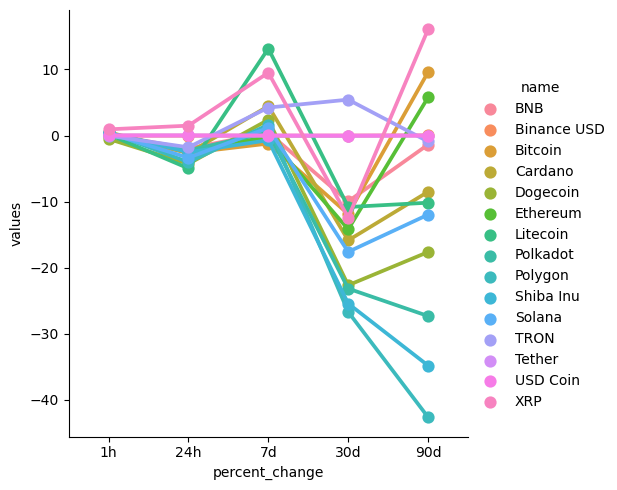

In [32]:
sns.catplot(x='percent_change', y='values',hue='name', data=df6, kind='point')

In [39]:
df8=df[['name','quote.USD.price','timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,26626.83374,2023-05-18 20:24:47.709672
1,Ethereum,1787.33140,2023-05-18 20:24:47.709672
2,Tether,1.00010,2023-05-18 20:24:47.709672
3,BNB,307.51840,2023-05-18 20:24:47.709672
4,USD Coin,1.00003,2023-05-18 20:24:47.709672
5,XRP,0.45580,2023-05-18 20:24:47.709672
6,Cardano,0.36925,2023-05-18 20:24:47.709672
7,Dogecoin,0.07200,2023-05-18 20:24:47.709672
8,Solana,20.33904,2023-05-18 20:24:47.709672
9,Polygon,0.85304,2023-05-18 20:24:47.709672


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

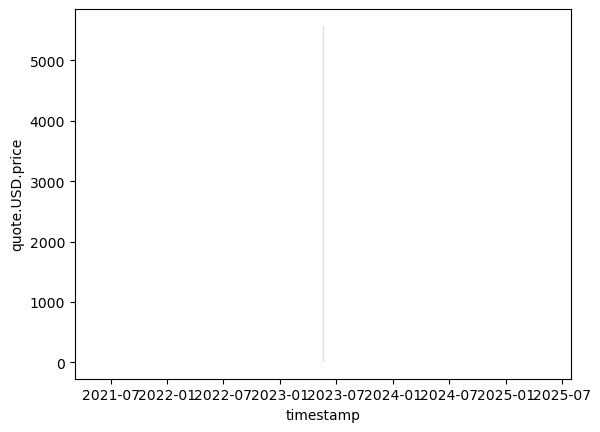

In [40]:
sns.lineplot(x='timestamp',y='quote.USD.price', data = df8)